In [37]:
from sklearn.datasets import fetch_openml

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from time import time

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

# Вариант 8, датасет ricci_vs_destefano

1. (1 балл) Загрузите предложенный вам датасет с помощью функции `sklearn.datasets.fetch_openml`. Выведите текстовое описание загруженного датасета. Обозначьте целевую переменную за `y`, а остальные данные за `X`.

In [38]:
from sklearn.datasets import fetch_openml

In [39]:
data = fetch_openml('ricci_vs_destefano', parser='auto')

In [40]:
print(data.DESCR)

DESCRIPTIVE ABSTRACT:
The data set contains the oral, written and combined test scores for 2003 New Haven Fire Department 
promotion exams. The Race and Position for each test taker are also given. 


SOURCES:
The data was obtained from the district court's decision, the briefs and appendices to them. 

Ricci v. DeStefeno, 554 F. Supp. 2d 142 (United States District Court for the district of Connecticut)


VARIABLE DESCRIPTIONS:

Columns 
1 Race -- W = white, H=Hispanic, B=black
3-12 Position -- Captain or Lieutenant
14-18 Oral -- Oral exam score
20-21 Written -- Written exam score
23-28 Combine -- Weighted total score, with 60% written and 40% oral

Values are centered and delimited by blanks. There are no missing values.

STORY BEHIND THE DATA:
In November and December of 2003, the New Haven Fire Department administered oral and written exams 
for promotion to Lieutenant and Captain. Under the contract between the City of New Haven and the 
firefighter's union, the written exam recei

In [41]:
X = data.data
y = data.target

# Основная информация

2. (1 балл) Выведите основную статистическую информацию о данных. Сделайте количественное описание датасета: число строк (объектов), число столбцов (признаков), статистику по признакам, количество классов (значений целевой переменной).

In [42]:
X.shape

(118, 5)

In [43]:
X.head()

,Position,Oral,Written,Race,Combine
0,Captain,89.52,95,W,92.808
1,Captain,80.00,95,W,89.000
2,Captain,82.38,87,W,85.152
3,Captain,88.57,76,W,81.028
4,Captain,76.19,84,W,80.876


In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Position  118 non-null    object 
 1   Oral      118 non-null    float64
 2   Written   118 non-null    int64  
 3   Race      118 non-null    object 
 4   Combine   118 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.7+ KB


Количество классов

In [45]:
y.value_counts()

Promotion
No promotion    62
Promotion       56
Name: count, dtype: int64

Количество классов равно двум, а значит я имею дело с бинарной классификацией.

3. (1 балл) Убедитесь, что данные пригодны для моделирования. В данных не должно быть пропущенных значений, ве признаки должны быть численными. Если эти условия нарушаются, исправьте это.

Сначала проверю данные на NaN значения. Выведу строки, содержащие NaN.

In [46]:
X[X.isnull().any(axis=1)]

,Position,Oral,Written,Race,Combine


In [47]:
y[y.isnull()]

Series([], Name: Promotion, dtype: object)

Таких строк нет, а значит данные пригодны.

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Position  118 non-null    object 
 1   Oral      118 non-null    float64
 2   Written   118 non-null    int64  
 3   Race      118 non-null    object 
 4   Combine   118 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.7+ KB


Признаки содержат тип Object(здесь это строки). Разрешу эту ситуацию с помощью one-hot кодирования

In [49]:
X = pd.get_dummies(X, drop_first=True).astype(float)

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Oral                 118 non-null    float64
 1   Written              118 non-null    float64
 2   Combine              118 non-null    float64
 3   Position_Lieutenant  118 non-null    float64
 4   Race_H               118 non-null    float64
 5   Race_W               118 non-null    float64
dtypes: float64(6)
memory usage: 5.7 KB


Теперь все данные содержат численные значения, а значит по ним можно строить модель

In [51]:
all_models = pd.DataFrame(columns=['name', 'accuracy', 'time'])

In [52]:
all_models

,name,accuracy,time


4. (2 балла) Обучите модель логистической регрессии на рассматриваемых данных из библиотеки `sklearn`. Рассчитайте метрики accuracy и выведите таблицу классификации.

# Логистическая регрессия

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
start = time()

model = LogisticRegression()
model.fit(X, y)

y_pred = model.predict(X)

score_ = metrics.accuracy_score(y, y_pred)

cf_m = metrics.confusion_matrix(y, y_pred)

end = time() - start
    
all_models.loc[-1] = [f'Logistic regression', score_, end]
all_models.index = all_models.index + 1

In [55]:
print(f'Accuracy: {score_}')

Accuracy: 1.0


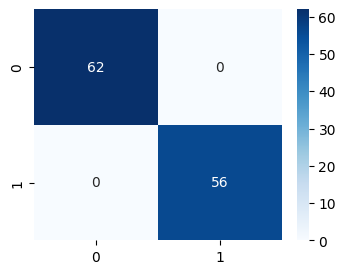

In [56]:
plt.figure(figsize=(4, 3))
ax = plt.subplot()
sns.heatmap(cf_m, annot=True, cmap='Blues', ax=ax);

Модель идеально разделила представленные классы

5. (2 балла) Обучите полиномиальную модель классификации. Рассчитайте метрики accuracy и выведите таблицу классификации. Попробуйте разные степени полинома и выберите ту, которая работает лучше.

# Полиномиальная модель

In [57]:
from sklearn.preprocessing import PolynomialFeatures

transf = PolynomialFeatures(degree=2)
transf.fit(X)

X_2 = transf.transform(X)

In [58]:
model = LogisticRegression(max_iter=10_000)
model.fit(X_2, y)

LogisticRegression(max_iter=10000)

In [59]:
metrics.accuracy_score(y, y_pred)

1.0

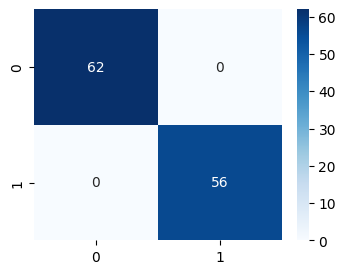

In [60]:
cf_m = metrics.confusion_matrix(y, y_pred)

plt.figure(figsize=(4, 3))
ax = plt.subplot()
sns.heatmap(cf_m, annot=True, cmap='Blues', ax=ax);

In [61]:
X_2.shape

(118, 28)

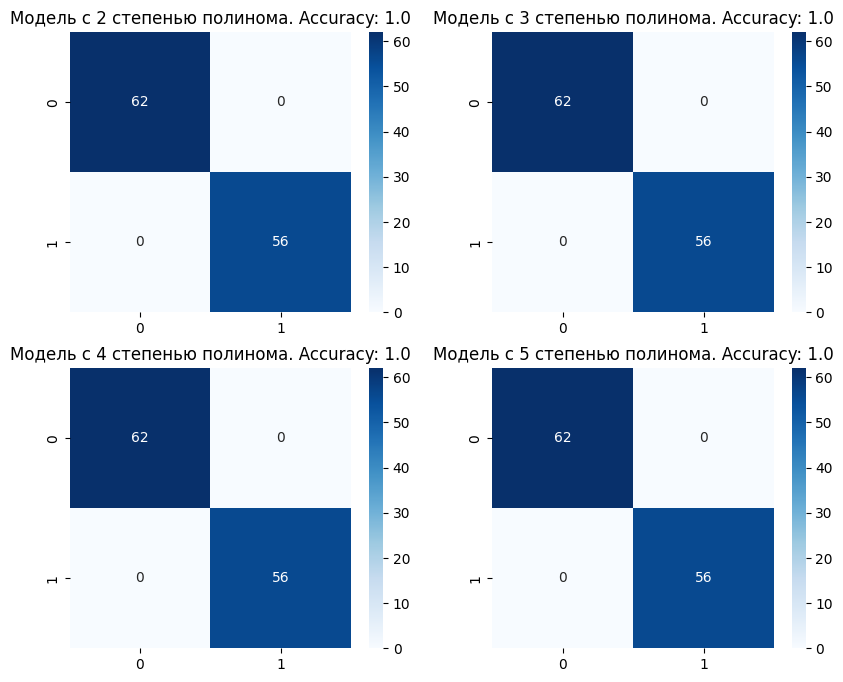

In [62]:
fig = plt.figure(figsize=(10, 8))

degrees = [2, 3, 4, 5]
for i, degree in enumerate(degrees):
    start = time()
    
    transf = PolynomialFeatures(degree=degree)
    transf.fit(X)

    X_poly = transf.transform(X)
    
    model = LogisticRegression(max_iter=10_000)
    model.fit(X_2, y)
    
    score_ = metrics.accuracy_score(y, y_pred)
    
    end = time() - start
    
    all_models.loc[-1] = [f'Polynomial {degree} degree', score_, end]
    all_models.index = all_models.index + 1
    
    cf_m = metrics.confusion_matrix(y, y_pred)
    
    ax = fig.add_subplot(2, 2, 1 + i)
    ax.set_title(f'Модель с {degree} степенью полинома. Accuracy: {score_}')
    sns.heatmap(cf_m, annot=True, cmap='Blues', ax=ax)

Все модели идеально разделяют классы, но повышение степени полинома сильно сказывается на количестве признаков, а значит и на производительность.

6. (2 балла) Обучите модель классификации по методу опорных векторов. Рассчитайте метрики accuracy и выведите таблицу классификации. Попробуйте разные ядерные функции и выберите ту, которая работает лучше.

# Метод опорных векторов

In [63]:
from sklearn.svm import SVC

model = SVC().fit(X, y)

In [64]:
y_pred = model.predict(X)

metrics.accuracy_score(y, y_pred)

0.9152542372881356

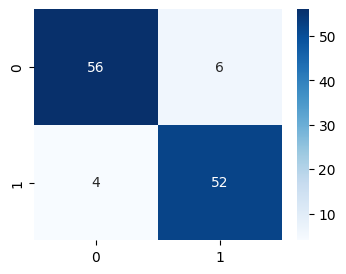

In [65]:
cf_m = metrics.confusion_matrix(y, y_pred)

plt.figure(figsize=(4, 3))
ax = plt.subplot()
sns.heatmap(cf_m, annot=True, cmap='Blues', ax=ax);

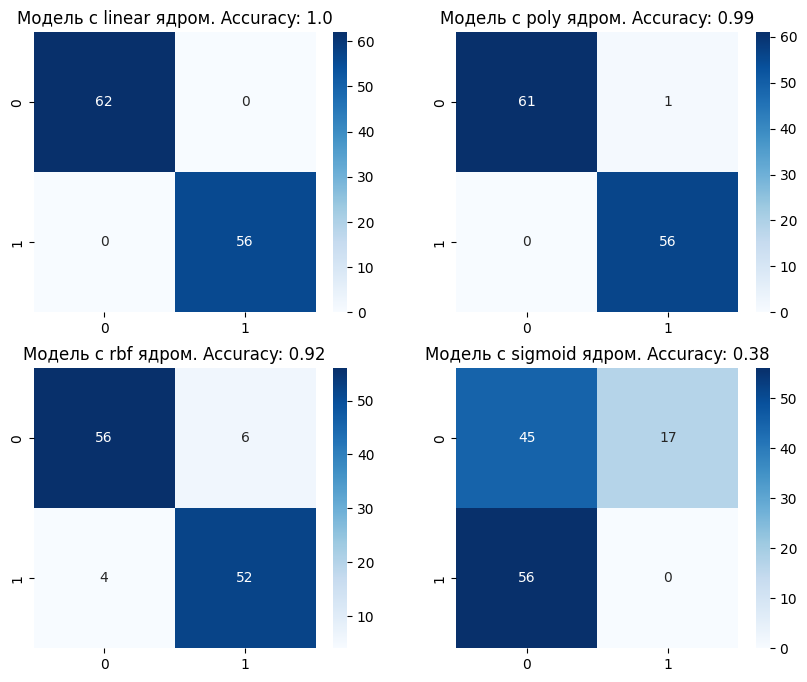

In [66]:
fig = plt.figure(figsize=(10, 8))

for i, kernel in enumerate(('linear', 'poly', 'rbf', 'sigmoid')):
    start = time()
    
    model = SVC(kernel=kernel).fit(X, y)
    y_pred = model.predict(X)
    
    score_ = metrics.accuracy_score(y, y_pred)
    
    all_models.loc[-1] = [f'Support Vector Machine {kernel}', score_, end]
    all_models.index = all_models.index + 1
    
    cf_m = metrics.confusion_matrix(y, y_pred)
    
    end = time() - start

    ax = fig.add_subplot(2, 2, 1 + i)
    ax.set_title(f'Модель с {kernel} ядром. Accuracy: {round(score_, 2)}')
    sns.heatmap(cf_m, annot=True, cmap='Blues', ax=ax)

Качество модели очень разнится от ядра, что связано с тем, как именно модель выбирает опорные точки, для построения 'зазора'

7. (1 балл) Обучите модель классификации Перцептрон. Рассчитайте метрики accuracy и выведите таблицу классификации. 

# Перцептрон

In [67]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter=2_000).fit(X, y)

In [68]:
y_pred = model.predict(X)

metrics.accuracy_score(y, y_pred)

0.940677966101695

In [69]:
y_pred = model.predict(X)

metrics.accuracy_score(y, y_pred)

0.940677966101695

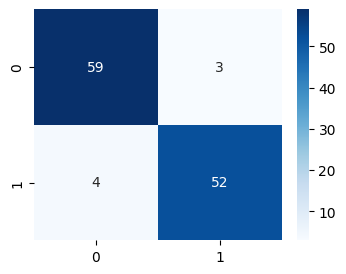

In [70]:
cf_m = metrics.confusion_matrix(y, y_pred)

plt.figure(figsize=(4, 3))
ax = plt.subplot()
sns.heatmap(cf_m, annot=True, cmap='Blues', ax=ax);

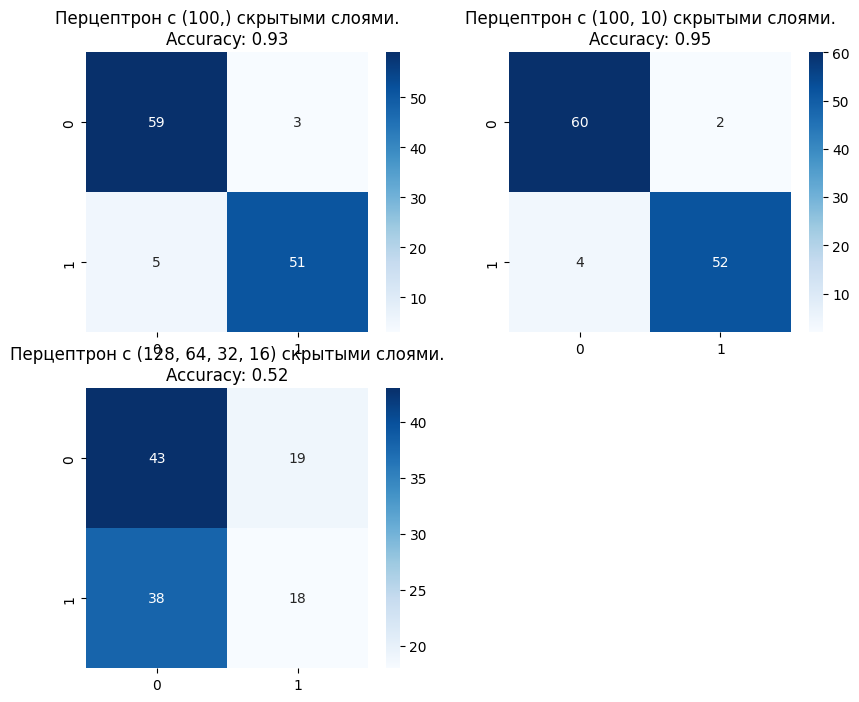

In [71]:
fig = plt.figure(figsize=(10, 8))
fig.tight_layout()

for i, h_l_size in enumerate(((100,),(100, 10,), (128, 64, 32, 16))):
    start = time()
    model = MLPClassifier(hidden_layer_sizes=h_l_size, max_iter=2_000).fit(X, y)
    y_pred = model.predict(X)
    
    score_ = metrics.accuracy_score(y, y_pred)
    
    all_models.loc[-1] = [f'perceptron {h_l_size} layer size', score_, end]
    all_models.index = all_models.index + 1
    
    cf_m = metrics.confusion_matrix(y, y_pred)

    ax = fig.add_subplot(2, 2, 1 + i)
    ax.set_title(f'Перцептрон с {h_l_size} скрытыми слоями.\nAccuracy: {round(score_, 2)}')
    sns.heatmap(cf_m, annot=True, cmap='Blues', ax=ax)

Увеличение количества слоёв и нейронов на них не всегда приводит к повышению качества, но всегда увеличивает время обучения модели.

Также стоит заметить, что перцептрон в данной задаче очень зависим от случайных значений весов при инициализации.

8. (2 балла) Выведите итоговую таблицу сравнения всех моделей. В таблице должна быть информация о эффективности и времени обучения каждой модели. Сделайте вывод о применимости и эффективности моделей для классификации объектов в данной задаче.


Рассмотрю таблицу всех использованных моделей, выделив для них значение метрики и время обучения.

In [72]:
all_models.sort_values(by=['accuracy', 'time'], ascending=[True, False])

,name,accuracy,time
3,Support Vector Machine sigmoid,0.381356,0.012002
0,"perceptron (128, 64, 32, 16) layer size",0.516949,0.009005
4,Support Vector Machine rbf,0.915254,0.009514
2,"perceptron (100,) layer size",0.932203,0.009005
1,"perceptron (100, 10) layer size",0.949153,0.009005
5,Support Vector Machine poly,0.991525,0.010714
10,Polynomial 2 degree,1.000000,0.125835
8,Polynomial 4 degree,1.000000,0.103674
7,Polynomial 5 degree,1.000000,0.101619
6,Support Vector Machine linear,1.000000,0.101619


Для данной задачи лучше всего подходит логистическая регрессия или метод опорных векторов с линейным ядром. Полиномиальные модели, хоть и показали качество, равное 1, не рекомендованы, так как они это просто усложнение логистической регресии, увеличивающее затраты по времени обучения и занимаемой памяти, при всём этом не улучшая результат.